In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

* Agrupamento de séries temporais consiste em agrupar variáveis que possuem tendências semelhantes ao longo do tempo, criando clusters
* Nesta base constam alguns indicadores presentes no portal do IPEA

In [2]:
df = pd.read_excel("dados_ipea.xlsx")

In [3]:
df.head()

,Ano,PIB_consumo_governo,PIB_exportacoes_bens_servicos,PIB_servicos_comercio,Taxa_fecundidade,Abate_suinos,linhas_telefonicas,taxa_cambio,exportacoes_bens_consumo_duraveis,exportacoes_bens_intermediarios,Importacoes_combustiveis,termos_troca_comercio
0,2006,458733.169348,346341.955,228624.628822,2.037276,25221.891,99.9,2.175325,6643.8,73.28,90.93,91.52
1,2007,515299.071419,362547.808,270798.534525,1.990672,27410.308,121.0,1.947058,6798.9,82.05,99.30,94.84
2,2008,585868.021615,420880.766,322108.956315,1.947133,28840.083,150.6,1.833767,6996.3,104.68,146.00,98.20
3,2009,654963.511591,361680.469,361913.880318,1.906499,30932.830,174.0,1.996767,4749.6,92.58,95.95,95.12
4,2010,738966.000000,422220.000,416229.000000,1.750200,32510.569,202.9,1.759407,6023.0,113.81,118.34,110.89


In [4]:
df.columns

Index(['Ano', 'PIB_consumo_governo', 'PIB_exportacoes_bens_servicos',
       'PIB_servicos_comercio', 'Taxa_fecundidade', 'Abate_suinos',
       'linhas_telefonicas', 'taxa_cambio',
       'exportacoes_bens_consumo_duraveis', 'exportacoes_bens_intermediarios',
       'Importacoes_combustiveis', 'termos_troca_comercio'],
      dtype='object')

In [5]:
df['Ano'] = df['Ano'].astype('str')

* Escalando as variáveis usando o StandardScale (média 0 e desvio-padrão 1)

In [6]:
from sklearn.preprocessing import StandardScaler
escaladas = {}
colunas = ['PIB_consumo_governo', 'PIB_exportacoes_bens_servicos',
       'PIB_servicos_comercio', 'Taxa_fecundidade', 'Abate_suinos',
       'linhas_telefonicas', 'taxa_cambio',
       'exportacoes_bens_consumo_duraveis', 'exportacoes_bens_intermediarios',
       'Importacoes_combustiveis', 'termos_troca_comercio']
df_escal = df.copy()
for col in colunas:
    scaler = StandardScaler()
    scaler.fit(df_escal[[col]])
    df_escal.loc[:,col] = scaler.transform(df_escal[[col]])
    escaladas[col] = scaler

In [7]:
df_escal.head()

,Ano,PIB_consumo_governo,PIB_exportacoes_bens_servicos,PIB_servicos_comercio,Taxa_fecundidade,Abate_suinos,linhas_telefonicas,taxa_cambio,exportacoes_bens_consumo_duraveis,exportacoes_bens_intermediarios,Importacoes_combustiveis,termos_troca_comercio
0,2006,-1.553766,-1.037097,-1.567021,2.327394,-1.635687,-2.258105,-0.603964,0.847352,-1.709935,-0.697640,-1.380009
1,2007,-1.402320,-0.993442,-1.390899,1.845796,-1.354173,-1.854517,-0.800829,0.988827,-1.230298,-0.431479,-0.973341
2,2008,-1.213384,-0.836308,-1.176622,1.395874,-1.170249,-1.288347,-0.898536,1.168887,0.007349,1.053555,-0.561772
3,2009,-1.028392,-0.995779,-1.010393,0.975962,-0.901041,-0.840767,-0.757959,-0.880454,-0.654407,-0.538007,-0.939043
4,2010,-0.803489,-0.832700,-0.783568,-0.639198,-0.698084,-0.287986,-0.962666,0.281085,0.506674,0.173983,0.992633


* Transpondo a tabela, assim, cada observação será uma variavel, permitindo agrupá-las pelo comportamento ao longo dos anos

In [8]:
df_escal = df_escal.transpose()

In [9]:
df_escal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Ano,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
PIB_consumo_governo,-1.553766,-1.402320,-1.213384,-1.028392,-0.803489,-0.594464,-0.393284,-0.085136,0.181523,0.392770,0.638734,0.772904,0.948863,1.171438,1.312534,1.655470
PIB_exportacoes_bens_servicos,-1.037097,-0.993442,-0.836308,-0.995779,-0.832700,-0.604607,-0.429568,-0.283631,-0.255821,0.113473,0.135316,0.250762,0.791187,0.841035,1.408420,2.728759
PIB_servicos_comercio,-1.567021,-1.390899,-1.176622,-1.010393,-0.783568,-0.524597,-0.231865,0.042704,0.303606,0.341800,0.400512,0.594249,0.748297,0.913432,1.139210,2.201157
Taxa_fecundidade,2.327394,1.845796,1.395874,0.975962,-0.639198,-0.498658,-0.691901,-0.754937,-0.339518,-0.096673,-1.124887,-0.370519,-0.428388,-0.483158,-0.534827,-0.582362


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* Transformando a primeira linha, o ano, nas colunas

In [11]:
titulos = 0
df_escal.columns = df_escal.iloc[titulos]
df_escal = df_escal.drop('Ano')

In [12]:
df_escal.head()

Ano,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
PIB_consumo_governo,-1.553766,-1.402320,-1.213384,-1.028392,-0.803489,-0.594464,-0.393284,-0.085136,0.181523,0.392770,0.638734,0.772904,0.948863,1.171438,1.312534,1.655470
PIB_exportacoes_bens_servicos,-1.037097,-0.993442,-0.836308,-0.995779,-0.832700,-0.604607,-0.429568,-0.283631,-0.255821,0.113473,0.135316,0.250762,0.791187,0.841035,1.408420,2.728759
PIB_servicos_comercio,-1.567021,-1.390899,-1.176622,-1.010393,-0.783568,-0.524597,-0.231865,0.042704,0.303606,0.341800,0.400512,0.594249,0.748297,0.913432,1.139210,2.201157
Taxa_fecundidade,2.327394,1.845796,1.395874,0.975962,-0.639198,-0.498658,-0.691901,-0.754937,-0.339518,-0.096673,-1.124887,-0.370519,-0.428388,-0.483158,-0.534827,-0.582362
Abate_suinos,-1.635687,-1.354173,-1.170249,-0.901041,-0.698084,-0.394165,-0.248464,-0.212406,-0.103836,0.170661,0.563758,0.675106,0.823274,1.083015,1.468910,1.933379


* Verificando a melhor quantidade de clusters com base no Silhouette Score
    * A melhor opção é, a principio, de 03 clusters

In [15]:
silhouette_scores = []
for x in range(2, 6+1):
    kmeans = KMeans(init = 'k-means++',n_init = 200,max_iter = 3000,n_clusters=x,random_state=50)
    kmeans.fit(df_escal)
    score = silhouette_score(df_escal, kmeans.labels_)
    silhouette_scores.append(score)

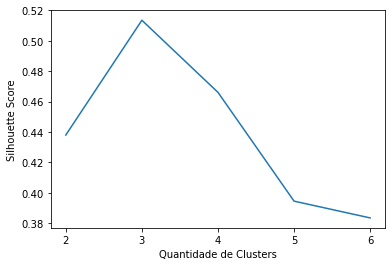

In [16]:
plt.plot(range(2, 6+1), silhouette_scores)
plt.xticks(range(2, 6+1))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [18]:
kmeans = KMeans(init = 'k-means++',n_init = 1000,max_iter = 3000,n_clusters=3, random_state=50)
df_escal.loc[:,'cluster'] = kmeans.fit_predict(df_escal)

* Foram criados 03 clusters, descritos:
    * Cluster 0: Contém 02 indicadores que oscilam de forma distinta dos demais, tendo uma variação própria
    * Cluster 1: Contém 06 indicadores que possuem a tendência de elevação ao longo dos anos
    * Cluster 2: Contém 03 indicadores que oscilam em ciclos semelhantes, possuindo tendências muito parecidas

In [22]:
df_escal['cluster'].value_counts()

1    6
2    3
0    2
Name: cluster, dtype: int64

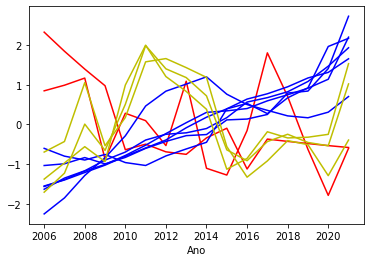

In [23]:
for n in range(2):
    df_escal.loc[df_escal.cluster==0].iloc[n,:-1].plot(color='r')
for n in range(6):
    df_escal.loc[df_escal.cluster==1].iloc[n,:-1].plot(color='b')
for n in range(3):
    df_escal.loc[df_escal.cluster==2].iloc[n,:-1].plot(color='y')